# A3

In [1]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import Network as Network
import copy

# Q1: Vanishing Gradient

## (a)


We know that logistic function's derivative:

$$
\begin{equation}
\sigma' = \sigma(z)(1-\sigma(z))
\end{equation}
$$
Then
$$
\begin{equation}
|w\sigma'(wh + b)| \geq 1 \\
|w (\frac {1} {1 + e^{-wh-b}}(1 - \frac {1} {(1 + e^{-wh-b})}))| \geq 1\\
|w(\frac {1} {1 + e^{-wh-b}}) (-\frac {e^{-wh-b}} {1+e^{-wh-b}})| \geq 1\\
|w\frac {e^{-wh-b}} {(1+e^{-wh-b})^2}| \geq 1\\
let\ x = -wh-b\\
|w\frac {e^{x}} {(1+e^{x})^2}| \geq 1\\
\end{equation}
$$
let's look at f and try to find its maximum.value:
$$
\begin{equation}
f(x) = \frac {e^{x}} {(1+e^{x})^2}\\
f'(x) = e^{x}(\frac {{e^{x}(1+e^{x})^2 - e^{x}(2e^{2x} +2e^{x}))}} {(1+e^{x})^4})\\
let\ f'(x) = 0\\
then\\
e^{x}(\frac {{e^{x}(1+e^{x})^2 - e^{x}(2e^{2x} +2e^{x}))}} {(1+e^{x})^4}) = 0\\
Obviously\ the\ first\ solution\ will\ be\ x=-\infty\ so\ that\ e^x = 0\\
And\ the\ second\ solution\ will\ be\ x=+\infty\ so\ that\ second\ term\ will\ be\ divided\ by\ infinity\ to\ make\ f'=0\\ 
then\ the\ third\ solution\ will\ be\ the\ x\ value\ to\ make\ e^{x}(1+e^{x})^2 - e^{x}(2e^{2x} +2e^{x}))=0\\
1+2e^{x} + e^{2x} - 2e^{3x} - 2e^{2x}=0\\
x = 0\ is\ an\ solution,\
so\ that\ the\ maximum\ value\ of\ f\ is\ \frac {1} {(1+1)^2}\\
Then\ |w\frac 1 4| \geq 1\\
We\ can\ simply\ observe\ that\ |w| \geq 4\ to\ make\ it\ work\\
\end{equation}
$$


## (b)

We got from (a):
$$
\begin{equation}
|w\frac {e^{x}} {(1+e^{x})^2}| \geq 1\\
|w\frac {e^{-wh-b}} {(1+e^{-wh-b})^2}| \geq 1\\
|w\frac {1} {e^{wh+b}}| \geq (1 + \frac {1} {e^{wh+b}})^2\\
|w\frac {1} {e^{wh+b}}| \geq (\frac {1+e^{wh+b}} {e^{wh+b}})^2\\
Multiplied\ by\ (e^{wh+b})^2\ on\ both\ sides\ (note\ that\ this\ is\ positive\ for\ sure)\\
|we^{wh+b}| \geq (1+e^{wh+b})^2\\
since\ e^x\geq 0\\
|w|e^{wh+b} \geq (1+e^{wh+b})^2\\
if\ w \geq 0:\\
By\ rearranging\ and\ merging:\\
e^{2(wh+b)} + (2-w)e^{wh+b} + 1 \leq 0\\
if\ w < 0:\\
By\ rearranging\ and\ merging:\\
e^{2(wh+b)} + (2+w)e^{wh+b} + 1 \leq 0\\
Compute\ w\geq 0\ frist\\ 
The\ root\ of\ this\ equation\ is:\\
e^{wh+b} = \frac {w-2+\sqrt {w^2-4w}} {2}\ or\ \frac {w-2-\sqrt {w^2-4w}} {2}\\
We\ know\ that\ if\ we\ want\ to\ make\ this\ polynomial\ w.r.t.\ e^{wh+b}\ less\ or\ equal\ to\ zero,\ e^{wh+b}\ has\ to\ be:\\
\frac {w-2-\sqrt {w^2-4w}} {2} \leq e^{wh+b} \leq \frac {w-2+\sqrt {w^2-4w}} {2}\\
By\ rearranging\\
\frac {w}{2} - 1 - \sqrt {\frac {w^2}{4}-w}\leq e^{wh+b} \leq \frac {w}{2} - 1 + \sqrt {\frac {w^2}{4}-w}\\
Then\ taking\ log\\
ln(\frac {w}{2} - 1 - \sqrt {\frac {w^2}{4}-w})\leq wh+b \leq ln(\frac {w}{2} - 1 + \sqrt {\frac {w^2}{4}-w})\\
Rearranging\ to\ get\ h:\\
\frac {ln(\frac{w}{2}-1-\sqrt{\frac{w^2}{4}-w}) - b}w \leq h \leq \frac{ln(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})-b}{w}\\
\end{equation}
$$
Then we can get the width of h by substracting both sides.
$$
\begin{equation}
width \leq \frac{ln(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})-b}w - \frac{ln(\frac{w}{2}-1-\sqrt{\frac{w^2}{4}-w})-b}w\\
width \leq \frac{ln(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})-ln(\frac{w}{2}-1-\sqrt{\frac{w^2}{4}-w})}w\\
width \leq \frac 1 w ln\frac {\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w}} {\frac{w}{2}-1-\sqrt{\frac{w^2}{4}-w}}\\
width \leq \frac 1 w ln\frac {(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})^2} {(\frac{w}{2}-1-\sqrt{\frac{w^2}{4}-w})(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})}\\
width \leq \frac 1 w ln\frac {(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})^2} {(\frac{w}{2}-1)^2 -(\sqrt{\frac{w^2}{4}-w})^2}\\
width \leq \frac 1 w ln\frac {(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})^2} {(\frac{w^2}{4}-w+1)-\frac{w^2}{4}+w}\\
width \leq \frac 1 w ln\frac {(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})^2} {1}\\
width \leq \frac 1 w ln(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})^2\\
width \leq \frac 2 w ln(\frac{w}{2}-1+\sqrt{\frac{w^2}{4}-w})^2\\
width \leq \frac 2 w ln(\frac{w}{2}(1+\sqrt{1-\frac{4}{w}}) -1)\\
Since\ w\geq 0,\ this\ equation\ is\ the\ one\ we\ need\ to\ prove\ (w = |w|)\\
Now\ we\ look\ at\ w<0:\\
e^{2(wh+b)} + (2+w)e^{wh+b} + 1 \leq 0\\
The\ root\ of\ this\ equation\ is:\\
e^{wh+b} = \frac {-w-2+\sqrt {w^2+4w}} {2}\ or\ \frac {-w-2-\sqrt {w^2+4w}} {2}\\
We\ know\ that\ if\ we\ want\ to\ make\ this\ polynomial\ w.r.t.\ e^{wh+b}\ less\ or\ equal\ to\ zero,\ e^{wh+b}\ has\ to\ be:\\
\frac {-w-2-\sqrt {w^2+4w}} {2} \leq e^{wh+b} \leq \frac {-w-2+\sqrt {w^2+4w}} {2}\\
By\ rearranging\\
-\frac {w}{2} - 1 + \sqrt {\frac {w^2}{4}+w}\leq e^{wh+b} \leq -\frac {w}{2} - 1 - \sqrt {\frac {w^2}{4}+w}\\
Then\ taking\ log\\
ln(-\frac {w}{2} - 1 + \sqrt {\frac {w^2}{4}+w})\leq wh+b \leq ln(-\frac {w}{2} - 1 - \sqrt {\frac {w^2}{4}+w})\\
Rearranging\ to\ get\ h:\\
\frac {ln(-\frac{w}{2}-1+\sqrt{\frac{w^2}{4}+w}) - b}w \geq h \geq \frac{ln(-\frac{w}{2}-1-\sqrt{\frac{w^2}{4}+w})-b}{w}\\
width \leq \frac 1 w (ln(-\frac{w}{2}-1+\sqrt{\frac{w^2}{4}+w}) - ln(-\frac{w}{2}-1-\sqrt{\frac{w^2}{4}+w}))\\
width \leq \frac 1 w ln \frac {-\frac{w}{2}-1+\sqrt{\frac{w^2}{4}+w}}{-\frac{w}{2}-1-\sqrt{\frac{w^2}{4}+w}}\\
width \leq \frac 1 w ln \frac {(-\frac{w}{2}-1+\sqrt{\frac{w^2}{4}+w})^2}{(-\frac{w}{2}-1-\sqrt{\frac{w^2}{4}+w})(-\frac{w}{2}-1+\sqrt{\frac{w^2}{4}+w})}\\
width \leq \frac 1 w ln \frac {(-\frac{w}{2}-1+\sqrt{\frac{w^2}{4}+w})^2} {\frac {w^{2}}{4}+1+w-\frac{w^2}{4}-w}\\
width \leq \frac 1 w ln (-\frac{w}{2}-1+\sqrt{\frac{w^2}{4}+w})^2\\
width \leq \frac 2 w ln (-\frac{w}{2}-1+\sqrt{\frac{w^2}{4}+w})\\
If\ we\ want\ to\ add\ absolute\ value\ to\ it\ while\ w<0,\ we\ will\ get\\
width \leq \frac {2}{|w|}ln(\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}}) -1)\\
which\ is\ exactly\ the\ same\ as\ what\ we\ need.(achieved\ by\ adding\ a\ negative\ sign\ outside\ of\ absolute\ sign)\\
\end{equation}
$$

## (c) Plots

max value is 0.447741435400141 in -6.909090909090909


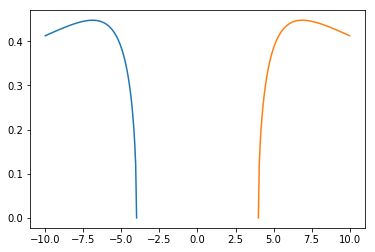

In [2]:

a = np.linspace(-10.0, -4.0, 100)
d = np.linspace(4.0, 10, 100)
e = np.concatenate((a, d), axis=None)
b = np.zeros(200)
c = 0
f = 0
p = 0
for i in e: 
    b[c] = (2.0/abs(i))*np.log((abs(i)/2.0)*(1+np.sqrt(1-4.0/abs(i))) -1)
    if (b[c] > f):
        f = b[c]
        p = i
    c = c+1
plt.plot(a, b[:100])
plt.plot(d, b[100:])
print("max value is "+str(f) +" in " + str(p))

# Q2: Dropout

## Dataset

In [3]:
def GenerateDatasets(n):
    # 1D -> 1D (line mapping)
    n_input = 1
    n_output = 1
    noise = 0.5

    #np.random.seed(452)
    a = np.random.rand()/2.
    m = np.random.rand() + 0.5
    b = np.random.rand()-0.5

    def myfunc(x):
        return a*x**2 + m*x + b

    # Create a training dataset
    n_samples = n
    training_output = []
    training_input = []
    xv = np.linspace(-1, 1, n_samples)
    for idx in range(n_samples):
        #x = np.random.rand()*2. - 1.
        x = xv[idx]
        t = myfunc(x) + np.random.normal(scale=noise)
        training_input.append(np.array([x]))
        training_output.append(np.array([t]))

    # Create a testing dataset
    test_input = []
    test_output = []
    n_test_samples = 300
    xv = np.linspace(-1, 1, n_test_samples)
    for idx in range(n_test_samples):
        #x = np.random.rand()*2. - 1.
        x = xv[idx] #+ np.random.normal(scale=0.1)
        t = myfunc(x) + np.random.normal(scale=noise)
        test_input.append(np.array([x]))
        test_output.append(np.array([t]))


    train = [np.array(training_input), np.array(training_output)]
    test = [np.array(test_input), np.array(test_output)]
    
    return train, test

## Sample Code

In [4]:
# Here is an example, creating a Network object.
net = Network.Network(cost='cross-entropy')
net.AddLayer(Network.Layer(1))
net.AddLayer(Network.Layer(6, act='logistic'))
net.AddLayer(Network.Layer(1, act='logistic'))

In [5]:
# Generate the training and testing datasets
P = 5
train, test = GenerateDatasets(P)

In [6]:
# Train the network
progress = net.SGD(train[0], train[1], epochs=100, lrate=1.)

In [7]:
# Evaluate the cost 
print('Training cost = '+str(net.Evaluate(train[0], train[1])))
print('    Test cost = '+str(net.Evaluate(test[0], test[1])))

# These results won't necessarily make sense, since the network model
# might not be the right choice for the dataset.

Training cost = -1.9486457674858007
    Test cost = -1.1476261037574893


## 2 (a), (b), 3 (a) Completing the RobustNetwork Class

In [8]:
class RobustNetwork(Network.Network):
    
    def FeedForward(self, x, dropout=0):
        '''
            y = net.FeedForward(x, dropout=0)

            Runs the network forward, starting with x as input.
            However, a random subset of the hidden nodes are set to 0 activity.
            Returns the activity of the output layer.

            Inputs:
              x is a batch of inputs
              dropout is a probability that a node is dropped, in [0,1]
              
            Outputs:
              y is the batch of outputs (no dropout or the output layer)
        '''
        if dropout==0.:
            self.dropout_nonzero = False  # Internal flag for dropout
            super(RobustNetwork, self).FeedForward(x)
        else:
            self.dropout_nonzero = True   # Internal flag for dropout
            
            x = np.array(x)  # Convert input to array, in case it's not
            
            self.lyr[0].h = x # Set input layer
            self.mask = []  # mask will record which nodes were dropped
            
            for i in self.lyr[1:-1]:
                tempm = np.random.choice([0,1], i.N, p = [dropout, 1-dropout])
                self.mask.append(tempm)  # Input layer does not have dropout
            
            # Loop over connections
            counter = 0
            for pre,post,W in zip(self.lyr[:-1], self.lyr[1:], self.W):
                if (pre != self.lyr[-2]):
                    # Calc. input current to next layer
                    post.z = (1/(1-dropout)) * pre.h @ (W*self.mask[counter]) + post.b

                    # Use activation function to get activities
                    post.h = post.sigma(post.z)
                else:
                    # Calc. input current to next layer
                    post.z = pre.h @ W + post.b

                    # Use activation function to get activities
                    post.h = post.sigma(post.z)
                
                
                counter += 1
                
        # Return activity of output layer
        return self.lyr[-1].h
    
    
    
    def BackProp(self, t, lrate=0.05, decay=0.):
        '''
            net.BackProp(targets, lrate=0.05)
            
            Given the current network state and targets t, updates the connection
            weights and biases using the backpropagation algorithm.
            
            Inputs:
             t      an array of targets (number of samples must match the
                    network's output)
             lrate  learning rate
             decay  is the coefficient for weight/bias decay
        '''
        t = np.array(t)  # convert t to an array, in case it's not

        # Error gradient for top layer
        dEdz = self.TopGradient(t)

        # Loop down through the layers
        for i in range(self.n_layers-2, -1, -1):
            pre = self.lyr[i]
#             if (decay!=0):
#                 print(pre.h.T @ dEdz)
#                 print(2*decay*self.W[i])
            # Gradient w.r.t. weights
            dEdW = pre.h.T @ dEdz + 2*decay*self.W[i]

            # Gradient w.r.t. biases
            dEdb = np.sum(dEdz, axis=0) + sum(2*decay*self.lyr[i].b)

            # Project error gradient down to layer below.
            if i>0:
                dEdz = ( dEdz @ self.W[i].T ) * pre.sigma_z_p(pre.z)

            # Update weights and biases
            self.W[i] -= lrate*dEdW
            self.lyr[i+1].b -= lrate*dEdb
    
    
    def SGD(self, inputs, targets, lrate=0.05, epochs=1, batch_size=10, decay=0, dropout=0):
        '''
            progress = net.SGD(inputs, targets, lrate=0.05, epochs=1, decay=0, dropout=0)

            Performs Stochastic Gradient Descent on the network.
            Run through the dataset in batches 'epochs' number of times, incrementing the
            network weights after each batch. For each epoch, it
            shuffles the dataset.

            Inputs:
              inputs  is an array of input samples
              targets is a corresponding array of targets
              lrate   is the learning rate (try 0.001 to 5)
              epochs  is the number of times to go through the training data
              decay   is the decay coefficient for the weights and biases
              dropout is the dropout probability
              
            Outputs:
              progress is an (expochs)x2 array with epoch in the first column, and 
                      cost in the second column
        '''
        loss_history = []
        for k in range(epochs):
            batches = Network.MakeBatches(inputs, targets, batch_size=batch_size, shuffle=True)
            for mini_batch in batches:
                self.FeedForward(mini_batch[0], dropout=dropout)
                #print("decay: " + str(decay))
                self.BackProp(mini_batch[1], lrate=lrate, decay=decay)

            loss_history.append([k, self.Evaluate(inputs, targets)])

        return np.array(loss_history)


## (c) Create the Network

In [9]:
original_net = RobustNetwork(cost='MSE')
inputlayer = Network.Layer(1)
hiddenlayer = Network.Layer(10, act='arctan')
outputlayer = Network.Layer(1, act='identity')
original_net.AddLayer(inputlayer)
original_net.AddLayer(hiddenlayer)
original_net.AddLayer(outputlayer)
dropout_net = copy.deepcopy(original_net)

## (d) Train and Evaluate without dropout

In [10]:
train, test = GenerateDatasets(5)
Loss_hist = original_net.SGD(train[0], train[1], epochs=5000, lrate=1., batch_size=5 ,dropout=0)
print('Training cost = '+str(original_net.Evaluate(train[0], train[1])))
print('    Test cost = '+str(original_net.Evaluate(test[0], test[1])))

Training cost = 2.022026667168972e-09
    Test cost = 0.42747754404973987


## (e) Train and Evaluate with dropout

In [11]:
Loss_hist2 = dropout_net.SGD(train[0], train[1], epochs=5000, lrate=1., batch_size=5 ,dropout=0.2)
print('Training cost = '+str(dropout_net.Evaluate(train[0], train[1])))
print('    Test cost = '+str(dropout_net.Evaluate(test[0], test[1])))

Training cost = 0.00912480322997304
    Test cost = 0.3834947281896659


## (f) Plot training data and models

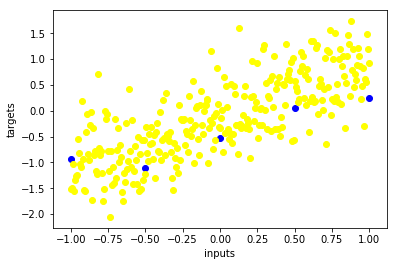

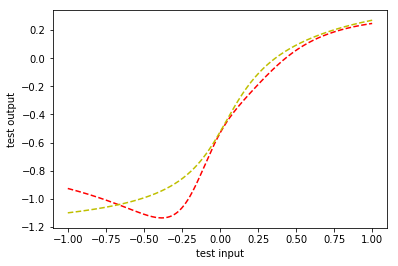

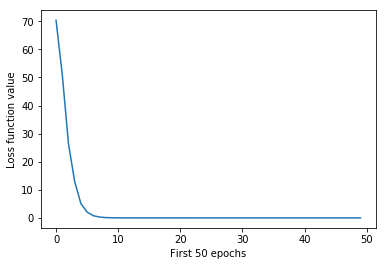

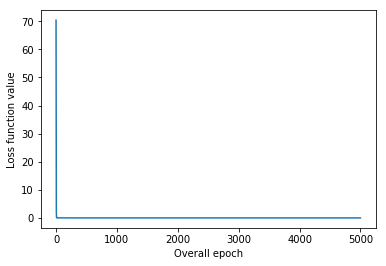

In [12]:
plt.scatter(train[0], train[1], color = 'blue')
plt.scatter(test[0], test[1], color = 'yellow')
plt.xlabel("inputs")
plt.ylabel("targets")
plt.show()


x = original_net.FeedForward(test[0])
x2 = dropout_net.FeedForward(test[0])
plt.plot(test[0], x, 'r--', label = 'No dropout')
plt.plot(test[0], x2, 'y--', label = 'With dropout')
plt.xlabel("test input")
plt.ylabel("test output")
plt.show()
# plt.plot(train[0], train[1], color = 'blue')
# plt.plot(test[0], test[1], color = 'yellow')
# plt.show()
a = []
for i in range(5000):
    a.append(Loss_hist[i][1])
#print(a)
#print(list(range(5000)))
plt.plot(list(range(50)), a[:50])
plt.xlabel("First 50 epochs")
plt.ylabel("Loss function value")
plt.show()
plt.plot(list(range(5000)), a)
plt.xlabel("Overall epoch")
plt.ylabel("Loss function value")
plt.show()

## (g) Average performance over 10 datasets

In [35]:
nodrop = 0
drop = 0
for i in range(10):
    original_net1 = RobustNetwork(cost='MSE')
    inputlayer1 = Network.Layer(1)
    hiddenlayer1 = Network.Layer(10, act='arctan')
    outputlayer1 = Network.Layer(1, act='identity')
    original_net1.AddLayer(inputlayer1)
    original_net1.AddLayer(hiddenlayer1)
    original_net1.AddLayer(outputlayer1)
    dropout_net1 = copy.deepcopy(original_net1)
    
    train2, test2 = GenerateDatasets(5)
    Loss_hist3 = original_net1.SGD(train2[0], train2[1], epochs=5000, lrate=1., batch_size=5 ,dropout=0)
    print("loop" + str(i+1))
    #print('Training cost = '+str(original_net1.Evaluate(train2[0], train2[1])))
    nodrop += original_net1.Evaluate(test2[0], test2[1])
    print('    Test cost without dropout = '+str(original_net1.Evaluate(test2[0], test2[1])))
    
    Loss_hist4 = dropout_net1.SGD(train2[0], train2[1], epochs=5000, lrate=1., batch_size=5 ,dropout=0.2)
    #print('Training cost = '+str(dropout_net1.Evaluate(train2[0], train2[1])))
    print('    Test cost with dropout= '+str(dropout_net1.Evaluate(test2[0], test2[1])))
    drop += dropout_net1.Evaluate(test2[0], test2[1])
nodrop = nodrop/10
drop = drop/10
print("nodrop" + str(nodrop))
print("drop" + str(drop))

loop1
    Test cost without dropout = 0.3785357615828536
    Test cost with dropout= 0.26978335113585844
loop2
    Test cost without dropout = 0.44410389317430715
    Test cost with dropout= 0.41498773944272965
loop3
    Test cost without dropout = 0.5979417685538574
    Test cost with dropout= 0.6659625321772741
loop4
    Test cost without dropout = 0.3304361169993766
    Test cost with dropout= 0.2789591290931051
loop5
    Test cost without dropout = 0.3671410334285605
    Test cost with dropout= 0.4616252232957981
loop6
    Test cost without dropout = 0.5036765163637263
    Test cost with dropout= 0.3414158341665183
loop7
    Test cost without dropout = 0.4016174071726782
    Test cost with dropout= 0.5065525246391663
loop8
    Test cost without dropout = 0.4385568296413277
    Test cost with dropout= 0.3944267964649445
loop9
    Test cost without dropout = 0.6753967284055343
    Test cost with dropout= 0.4398828978790441
loop10
    Test cost without dropout = 0.4780394920644403
   

We can see that the method using dropout is preferred holding less test costs. Because the dropout idea reduces the overfitting w.r.t. the training set, which makes the model more general to all data. That's why test set's error is smaller.
In details, according to the nodes: "It's akin to training a bunch of different networks and combining their answers. Each diminished network is like a contributor to this consensus strategy. Dropout disallows sensitivity to particular combinations of nodes. Instead, the network has to seek a solution that is robust to loss of nodes" (Jeff Orchard, 2019)

# Q3: Weight Decay

## (a) Implement weigth decay in BackProp (see code above)

## (b) Average performance over 10 datasets

In [14]:
nodrop1 = 0
drop1 = 0
for i in range(10):
    original_net2 = RobustNetwork(cost='MSE')
    inputlayer2 = Network.Layer(1)
    hiddenlayer2 = Network.Layer(10, act='arctan')
    outputlayer2 = Network.Layer(1, act='identity')
    original_net2.AddLayer(inputlayer2)
    original_net2.AddLayer(hiddenlayer2)
    original_net2.AddLayer(outputlayer2)
    decay_net = copy.deepcopy(original_net2)
    
    train3, test3 = GenerateDatasets(5)
    Loss_hist4 = original_net2.SGD(train3[0], train3[1], epochs=5000, lrate=1., batch_size=5, dropout=0)
    print("loop" + str(i+1))
    #print('Training cost = '+str(original_net1.Evaluate(train2[0], train2[1])))
    nodrop1 += original_net2.Evaluate(test3[0], test3[1])
    print('    Test cost without decay = '+str(original_net2.Evaluate(test3[0], test3[1])))
    
    Loss_hist4 = decay_net.SGD(train3[0], train3[1], epochs=5000, lrate=1., batch_size=5, decay=0.0004, dropout=0)
    #print('Training cost = '+str(dropout_net1.Evaluate(train2[0], train2[1])))
    print('    Test cost with decay= '+str(decay_net.Evaluate(test3[0], test3[1])))
    drop1 += decay_net.Evaluate(test3[0], test3[1])
nodrop1 = nodrop1/10
drop1 = drop1/10
print("nodecay: " + str(nodrop1))
print("withdecay: " + str(drop1))

loop1
    Test cost without decay = 0.30452605499746577
    Test cost with decay= 0.29875690687726847
loop2
    Test cost without decay = 0.3527090498904176
    Test cost with decay= 0.3168525028952291
loop3
    Test cost without decay = 0.4435628494786856
    Test cost with decay= 0.3727829464996475
loop4
    Test cost without decay = 0.3749351078711683
    Test cost with decay= 0.3871123183733975
loop5
    Test cost without decay = 0.34756855361026834
    Test cost with decay= 0.28952671671321684
loop6
    Test cost without decay = 0.28717811612284444
    Test cost with decay= 0.2666770363644122
loop7
    Test cost without decay = 0.4597719481288509
    Test cost with decay= 0.3890150050286097
loop8
    Test cost without decay = 0.3763523337133075
    Test cost with decay= 0.2753606642396359
loop9
    Test cost without decay = 0.5080635357757085
    Test cost with decay= 0.38002926125589254
loop10
    Test cost without decay = 0.5271717560535952
    Test cost with decay= 0.4509985414

With decay is preferred because of the same reason as using dropout. Avoid overfitting and generalizing model.

# Q4: Classifier Networks

## Create and interesting dataset

In [15]:
def ClassPlot(x, y):
    # FeedForward
    yc = Network.OneHot(y)
    colour_options = ['y', 'b', 'r', 'g', 'k']
    cidx = np.argmax(yc, axis=1)
    colours = [colour_options[k] for k in cidx]
    plt.scatter(x[:,0],x[:,1], color=colours, marker='.')
    plt.axis('equal');

def GaussianCluster(mu, sa, N, theta=0.):
    theta_rad = theta/180*np.pi
    c, s = np.cos(theta_rad), np.sin(theta_rad)
    R = np.array([[c,-s],[s,c]])
    M = R @ np.diag(sa) @ R.T
    y = np.random.multivariate_normal(mu, M, N)
    return y

def CreateDataset(params):
    '''
        train, test = CreateDataset(params)
        
        Creates a dataset using a bunch of Gaussian clouds.
        
        Inputs:
          params is a list of 5-tuples. Each tuple (or list)
             describes a 2-D Gaussian cloud:
             1) the mean
             2) standard deviation along x and y directions
             3) rotation of cloud (degrees counter-clockwise)
             4) class index
             5) number of points
             
        Outputs:
          train is a list containing 2 arrays
             - the first array contains the training inputs,
               one per row
             - the second array contains the corresponding classes
          test has the same structure as train, but with
               half the number of samples
    '''
    train_inputs = []
    train_outputs = []
    test_inputs = []
    test_outputs = []
    all_c = [p[3] for p in params]
    n_classes = np.max(all_c)
    for p in params:
        xx = GaussianCluster(p[0], p[1], p[4], theta=p[2])
        yy = np.zeros((p[4], n_classes+1))
        yy[:,p[3]] = 1.
        train_inputs.append(xx)
        train_outputs.append(yy)
        
        xtest = GaussianCluster(p[0], p[1], int(p[4]/2), theta=p[2])
        ytest = np.zeros((int(p[4]/2), n_classes+1))
        ytest[:,p[3]] = 1. 
        test_inputs.append(xtest)
        test_outputs.append(ytest)
    train = [np.vstack(train_inputs), np.vstack(train_outputs)]
    test = [np.vstack(test_inputs), np.vstack(test_outputs)]
    return train, test

# 0=y, 1=b, 2=r
params = [[[0.5, 0.5],   [0.025, 0.01],  -45, 0, 50],
          [[-0.5,-0.5],  [0.025, 0.01],  -45, 0, 50],
          [[-0.3,-0.35], [0.04,0.01],     10, 0, 80],
          [[0.6,0],      [0.01,0.01],      0, 0, 50],
          [[0.1,-0.04],  [0.1,0.005],     20, 0, 80],
          [[0.5,-0.5],   [0.02,0.01],     45, 1, 50],
          [[0,0.6],      [0.01,0.01],      0, 1, 50],
          [[-0.5,0.1],   [0.02,0.01],     30, 1, 80],
          [[-0.5,0.5],   [0.02,0.01],     45, 2, 50],
          [[0,-0.6],     [0.01,0.01],      0, 2, 50],
          [[0.2,0.3],    [0.01,0.004],     0, 2, 80],
          [[-0.2,0.37],  [0.02,0.005],   -30, 2, 50],
          [[0.25,-0.3],  [0.005,0.01],     0, 3, 60],
          [[-0.1,0.1],   [0.01,0.01],    -30, 3, 50]
         ]

In [16]:
train, test = CreateDataset(params)

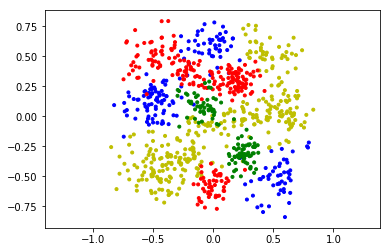

In [17]:
ClassPlot(train[0], train[1]);

## (a) Create and Evaluate a Neural Network

In [45]:
import Network as Network
net = RobustNetwork(cost = 'categorical-cross-entropy')
inputl = Network.Layer(2)
hiddenl = Network.Layer(5, act='logistic')
hidden2 = Network.Layer(5, act='tanh')
outputl = Network.Layer(4, act='softmax')
net.AddLayer(inputl)
net.AddLayer(hiddenl)
net.AddLayer(hidden2)
net.AddLayer(outputl)
progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5)
output = net.FeedForward(test[0])
Acc = Network.ClassificationAccuracy(output, test[1])
print("Classification accuracy is: "+str(Acc))

Classification accuracy is: 0.9180722891566265


## (b) Evaluate Model

Classification accuracy is: 0.9180722891566265


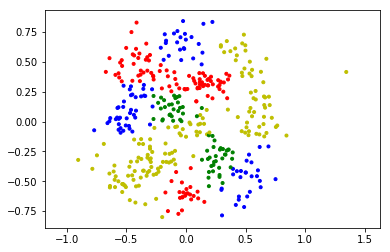

In [46]:
output = net.FeedForward(test[0])
print("Classification accuracy is: "+str(Network.ClassificationAccuracy(output, test[1])))
ClassPlot(test[0], output)

## (c) Crappy Network

In [22]:
import Network as Network

net = RobustNetwork()
inputl = Network.Layer(2)
hiddenl = Network.Layer(3, act='tanh')
hidden2 = Network.Layer(4, act='tanh')
hidden3 = Network.Layer(3, act='identity')
outputl = Network.Layer(4, act='logistic')
net.AddLayer(inputl)
net.AddLayer(hiddenl)
net.AddLayer(hidden2)
net.AddLayer(hidden3)
net.AddLayer(outputl)
progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5)
output = net.FeedForward(test[0])
Acc = Network.ClassificationAccuracy(output, test[1])
                   
print("Classification accuracy is: "+str(Acc))
# print(progress)

Classification accuracy is: 0.8578313253012049
